# Relation on sequences

In [16]:
using Plots
using LaTeXStrings

In [155]:
Plots.scalefontsizes(0.5)

In [17]:
function seq1(n)
    return n ^ 2
end

function fibo(n)
    if n < 0
        return -1
    end
    
    fvec = zeros(n + 1)
    for ni=0:n
        if ni == 0
            fvec[ni + 1] = 0
        elseif ni == 1
            fvec[ni + 1] = 1
        else
            fvec[ni + 1] = fvec[ni] + fvec[ni - 1]
        end
    end
    
    return fvec[end]
end

fibo (generic function with 1 method)

In [18]:
nvals = 1:13
an = seq1.(nvals)
bn = fibo.(nvals);

In [19]:
pgfplots()
plot(nvals, an, marker=true, linewidth=0.5)
plot!(nvals, bn, marker=true, linewidth=0.5)
savefig("test.tex")

Mathematicians love order. So much so that there is a widely used symbol to state whether two given numbers on the real line a $<$

Consider the sequence ${\bf a} = \{1, 0, 1, 0, 1, 0\}$ and ${\bf b} = \{2, 0, 2, 0, 2, 0\}$, and suppose that we want to stablish a relationship of order. Looking at these two examples, we might like to conclude that ${\bf b}$ has a higher *order* than ${\bf a}$, and in fact, if we define ${\bf c} = \{3, 0, 3, 0, 3, 0\}$, it might seem that there is a *rational* order to follow. However, let us consider the set ${\bf d} = \{0, 1, 0, 1, 0, 1\}$, would it be reasonable to say that ${\bf a}$ has a higher rank than ${\bf d}$?

Mathematicians love order, so much so that in any mathematics book that you grab, you most likely will find the symbol $<$. For any two numberw in the real line, $<$ represent a form of order. In popular culture, people even use it "incorrectly" to denote that one *thing* is more important than other (*tea* < *coffee*). But we as mathematicians, when defining order, need to do so in a way that is not ambiguous in any form.

For any two numbers on the real line, $<$ represents ranking. Informally speaking, for any two numbers $a, b \in \mathbb{R}$,  $a < b$ means that $a$ is to left of $b$ or that $a$ has a lower order than $b$. So, on the real line, is pretty easy to check whether $a < b$, we just need to check whether $a$ is to the left of $b$ to see whether the condition $a<b$ holds. 

However, things get more tricky if we want to compare a set of numbers. If we graph on a plane the points $(2, 1)$ and $(1, 2)$, we see that the condition $<$ defining it as being *to the left of* does not hold any longer. Sure, in terms of the x-axis, $(2,1)$ is to the right of $(1, 2)$, and we might be tempted to write $(2, 1) < (2, 1)$, ig that is true, what can we say about the relationship between the points $(-2, 2)$ and $(-2, 2)$?. Clearly the notion of *to the left of* does not hold any longer. If we consider a 3-dimensional vector things get more messy. As we now have width, high and depth. Imagine what happens if we have an infinite-dimensional vector? There is no clear way as to how to define it in terms of position, so we may seek a way to define an order in some other way.

One such way to think of infinite-dimensional vector is by an infinite series of numbers $(a_n)_{n=1}^\infty$

### Introducing $\prec$.

Imagine that we have two infinite-dimensional arrays $(a_n)_{n=1}^\infty$ and $(b_n)_{n=1}^\infty$ of positive real numbers. As we have seen, there is no clear way to use $<$ to compare which has higher-order, so we may come up with a definition that *makes sense*. One such way is to define the hierarchy in terms of *growth*. Roughly speaking, we may want to come up with a definition that states that $a$ is of lesser order than $b$ if $b$ grows more quickly than $a$. A way to think about growth is to ask whether $a$ can *catch-up* $b$. If $a$ can eventually catch $b$ and stay *above* $b$, then $a$ grows more quickly than $b$ and we define $a$ to be of higher order (a more powerful series!). If, on the contrary, $a$ can never catch up $b$ it means that every value $a_n$ will be below $b$.

Consider the series $a = \{n^2 \vert n\in\mathbb{N}\}$ and $b = \{\text{Fibo}(x) \vert x\in\mathbb{N}\}$, where $\text{Fibo(x)}$ is a function that returns the $x$-th value of the Fiboacci sequence. (figure 8). For the first $11$ values $a$ is above $fibo$. However, at $x=2$, $a_{12} = b_{12}$ and, for $n\geq 13$ $b$ is always above $a$.

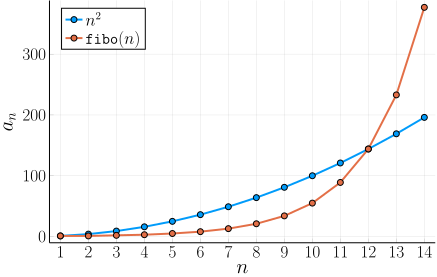

In [156]:
nvals = 1:14
an, bn = seq1.(nvals), fibo.(nvals)

plot(nvals, an, marker=true, linewidth=2, label=L"n^2", xticks=nvals, markersize=6)
plot!(nvals, bn, marker=true, linewidth=2, label=L"\texttt{fibo}(n)", markersize=6,
    legend=:topleft, xlabel=L"n", ylabel=L"a_n")

In fact, taking a close look at our example, we can see the relative difference between $a_n$ and $b_n$. At the beggining, $a_n$ grows much faster than $b_n$. This faster growth reaches a peak at $n=4$ and then $b_n$ starts growing faster (eventually reaching up).

At it maximum value, $an$ is 5.3333 time greater than $bn$! What this means is that, since the relative difference between $an$ and $bn$ is bounded above (it does not greater than 5x), it means that if we multiply each entry of $bn$ by 5.333, then every element of $b$ will always be less than or equal to $a$. In oder words, $a$ can never catch $b$ if the relative distance is finite, that is to say, there exists some constant $C$ (which we may or may not know) such that for every $n=1\ldots$, $a_n \leq C \cdot b_n$. Armed with this intuition, we can formally define the relationship $\prec$ between two series $(a_n)_n$ and $(b_n)_n$ as follows:

**Definition**   
Let $(a_n)_{n=1}^\infty$, $(b_n)_{n=1}^\infty$ be sequences of positive real numbers. We say that $(a_n)_{n=1}^\infty \prec (b_n)_{n=1}^\infty$. If there exists $C\in\mathbb{R}^{+}$ such that for every $n\in\mathbb{N}. a_n \leq C\cdot b_n$

In [138]:
pgfplots()
plot(nvals, an ./ bn, marker=true, xticks=nvals, label=nothing,
     xlabel=L"n", ylabel=L"a_n / b_n")
hline!([1], color="black", label=nothing)
savefig("figures/relative-growth.tikz")

In [77]:
maximum(an ./ bn)

5.333333333333333

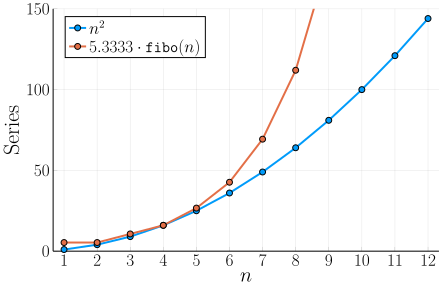

In [164]:
nvals = 1:12
an, bn = seq1.(nvals), fibo.(nvals)
plot(nvals, an, marker=true, linewidth=2, label=L"n^2", xticks=nvals, markersize=6)
p1 = plot!(nvals, 5.333 .* bn, marker=true, linewidth=2, markersize=6,
    label=L"5.3333 \cdot \texttt{fibo}(n)", ylim=(0, 150),
    legend=:topleft, xlabel=L"n", ylabel="Series")

In [166]:
pgfplots()
p1
savefig("figures/growth-2.tikz")